In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [296]:
advertising = pd.read_csv('/home/ranjani/Downloads/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


/home/ranjani/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


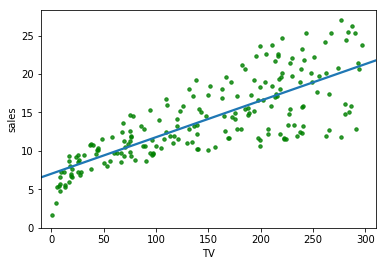

In [297]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'g', 's':12})
plt.xlim(-10,310)
plt.ylim(ymin=0);

Least squares fit for the regression of Sales onto TV. The fit is obtained by minimising the sum of squared errors. In simple linear regression a single independent variable is used to predict the value of a dependent variable.

In [298]:
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Regression determines the following:

- Do the predicting variables successfully predict the outcome?

- Which variables are most significant in prediction.

In [299]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


Coefficients of the least squares model
for the regression of number of units sold on TV advertising budget.

In [300]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

R^2 Statistic (TV)

In [301]:

est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


Coefficients of the least squares model
for the regression of number of units sold on Radio advertising budget.

In [302]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


Coefficients of the least squares model
for the regression of number of units sold on newspaper advertising budget.

In [303]:

est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


Multiple linear regression is used to explain the relationship between one continuous dependent variable and two or more independent variables.

In [304]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Least squares coefficient estimates of the
multiple linear regression of number of units sold on radio, TV, and newspaper
advertising budgets.

In [305]:
regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']].as_matrix()
y = advertising.sales

regr.fit(X,y)

/home/ranjani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [306]:
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

/home/ranjani/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:671: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


Text(0.5, 0, 'sales')

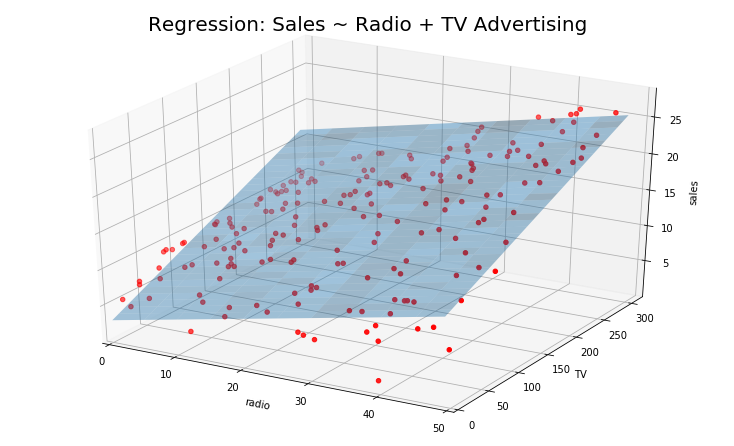

In [307]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')

ax.set_xlabel('radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('sales')

A linear regression fit to sales using
TV and radio as predictors. From the pattern of the residuals, we can see that
there is a pronounced non-linear relationship in the data.